In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv',thousands = ',')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [86]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [87]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507


In [88]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [89]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [118]:
paydate = pd.to_datetime(sales_data['결제일시'])
sales_data['month'] = paydate.dt.month # 결제일시의 '월' 추출
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,month
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,4
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,4
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,4
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,4
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,4
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2


In [130]:
sales_data['판매매출'] = abs(sales_data['판매수량']) * sales_data['결제금액']
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,month,판매매출
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,4,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,4,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,4,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,4,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,4,5000
...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2,-3500
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2,4500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2,-4500
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2,4000


In [131]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   month   7105 non-null   int64 
 9   판매매출    7105 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 555.2+ KB


In [134]:
salesMonth = sales_data.groupby('month').agg(sales_by_month = ('판매매출','sum')) # 월별로 groupby를 수행한 후, 판매매출을 모두 더함.
salesMonth

,sales_by_month
month,
1,1430500
2,1188500
3,3975400
4,3166500
5,2537000
6,3621500
7,1215000
8,1229000
9,1197500


<AxesSubplot:xlabel='month', ylabel='sales_by_month'>

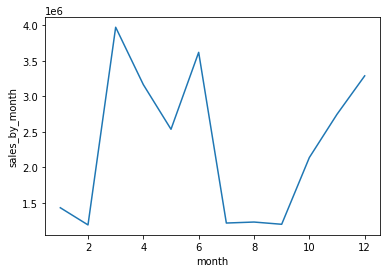

In [170]:
sns.lineplot(data = salesMonth, x='month',y='sales_by_month')

In [148]:
sales_data['실판매수량'] = np.where(sales_data['판매수량']>0, sales_data['판매수량'] , 0 ) 
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,month,판매매출,상품개수,실판매수량
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,4,4500,NaN,1
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,4,5500,NaN,1
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,4,4000,NaN,1
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,4,1000,NaN,1
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,4,5000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2,-3500,NaN,0
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2,4500,NaN,1
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2,-4500,NaN,0
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2,4000,NaN,1


In [188]:
salesNumber = sales_data.groupby('상품명').agg(판매개수 = ('실판매수량','sum')) # 상품명별로 groupby를 수행한 후, 실판매수량을 모두 더함.
salesNumber

,판매개수
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,21


In [189]:
popularList = salesNumber.sort_values('판매개수', ascending = False ) #판매개수가 많은 순서대로 정렬됨. (내림차순)
popularList

,판매개수
상품명,
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
...,...
라면(계란/치즈추가),1
녹차(HOT),1
이어폰(커널형),1


In [190]:
popular10 = popularList.head(10) # 판매 상위 10개의 데이터를 가져옴.
popular10

,판매개수
상품명,
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
